In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

import Boris as boris

#para leer los archivos necesitas instalar el paquete h5py, que lee archivos en formato hdf5 que es el formato de archivos que escribe el codigo de la simulacion.

name='C:/Users/lueiz/Desktop/Intro a la Investigación 2/flds.tot.00085'

f=h5py.File(name,'r') #llamamos al archivo en modo de lectura 'r'
bx=f.get('bx') #obtenemos el campo magnetico en x
bx=np.array(bx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bx=np.transpose(bx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

by=f.get('by') #obtenemos el campo magnetico en x
by=np.array(by)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
by=np.transpose(by) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

bz=f.get('bz') #obtenemos el campo magnetico en x
bz=np.array(bz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bz=np.transpose(bz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ex=f.get('ex') #obtenemos el campo magnetico en x
ex=np.array(ex)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ex=np.transpose(ex) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ey=f.get('ey') #obtenemos el campo magnetico en x
ey=np.array(ey)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ey=np.transpose(ey) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ez=f.get('ez') #obtenemos el campo magnetico en x
ez=np.array(ez)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ez=np.transpose(ez) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

#para las demas componentes del campo magnetico tienes que usar get('by') o 'bz', si quieres el campo electrico están en 'ex', 'ey' y 'ez'

b=np.array((bx,by,bz))

e=np.array((ex,ey,ez))

Nx=np.size(b[0,:,0])

Ny=np.size(b[0,0,:])

# drift_vel= np.loadtxt('C:/Users/lueiz/Desktop/Intro a la Investigación 2/Introduccion-a-la-Investigacion-II/velocity_drift_00085.txt').reshape(b.shape)

#gamma1= np.loadtxt('/content/gamma1.txt')

print(Nx,Ny)


5250 1536


In [2]:

v_i=np.transpose(np.array([[0.1,0,0],[0.1,0,0],[0.1,0,0],[0.1,0,0],[0.1,0,0],[0.1,0,0],[0.1,0,0],[0.999999,0,0]]))


# Factor de Lorentz

gamma0=np.zeros(len(v_i[0,:]))

for i in range(0,len(np.transpose(v_i))):
    gamma0[i]=1/np.sqrt((1-np.linalg.norm(np.transpose(v_i[:,i]))**2))
print(gamma0)


# Pasos temporales

c=0.45

istep=8

factor=10

dx=1
dt=1*c/istep

NT=30

x=np.arange(0,Nx,int(dx))
y=np.arange(0,Ny,int(dx))

r0 = np.transpose(np.array([[Nx/2, Ny/2 , 0],[Nx/4, Ny/4 , 0],[Nx/3, Ny/3 , 0],[Nx/3, Ny/2 , 0],[Nx/2+30, Ny/2 , 0],[Nx/2-30, Ny/2 , 0],[Nx/2+30, Ny/2+50 , 0],[Nx/2+70, Ny/2+50 , 0]]))

[  1.00503782   1.00503782   1.00503782   1.00503782   1.00503782
   1.00503782   1.00503782 707.10695795]


In [3]:
r_plot,v,gamma=boris.varias_particulas(x,y,v_i,gamma0,r0,ex,ey,ez,bx,by,bz,NT,Nx,Ny,dt)

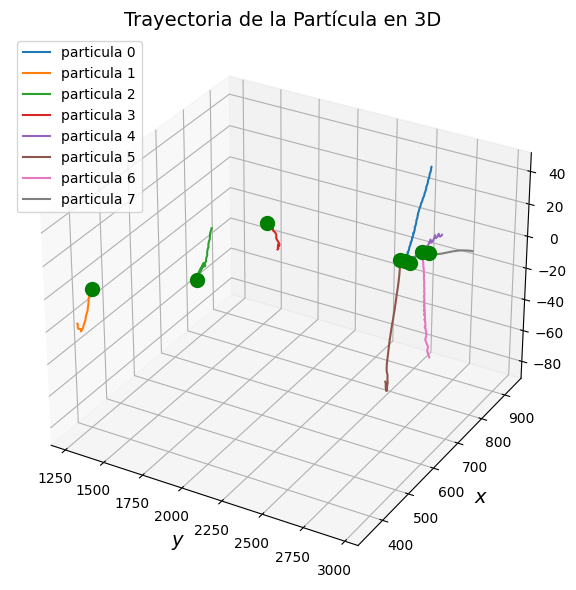

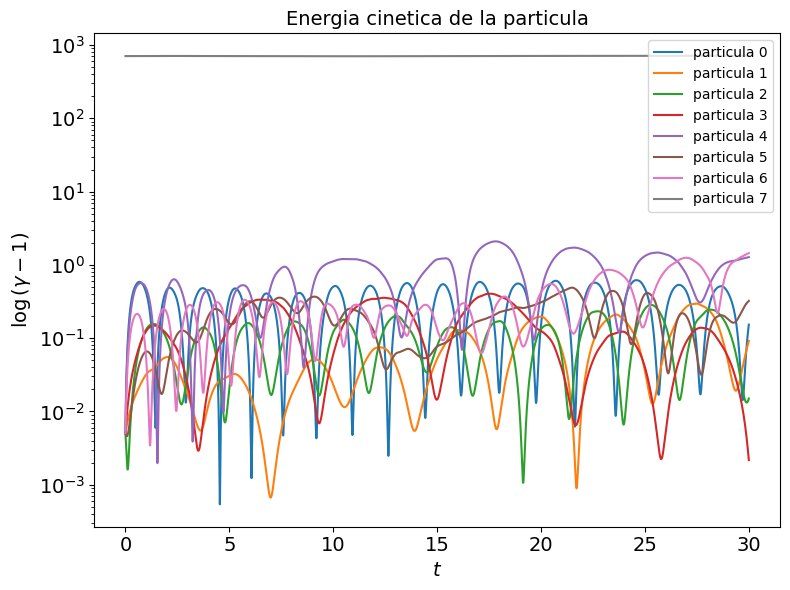

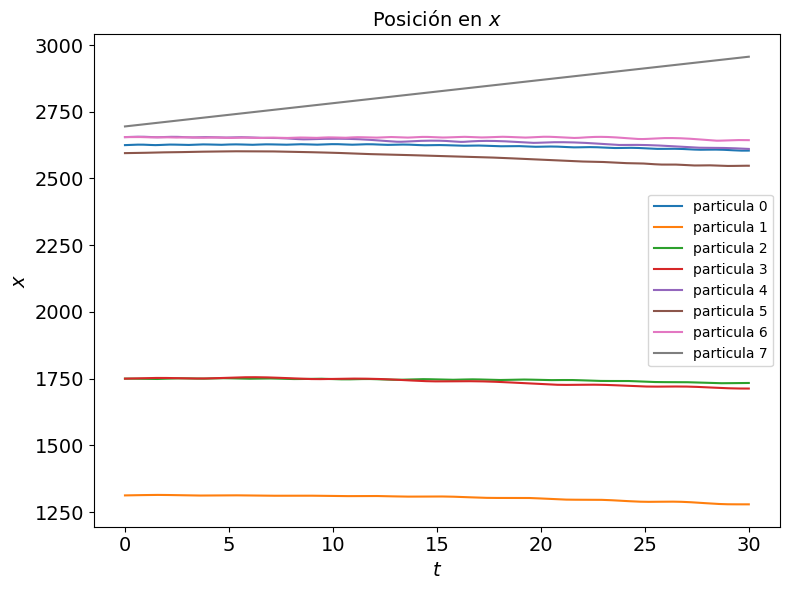

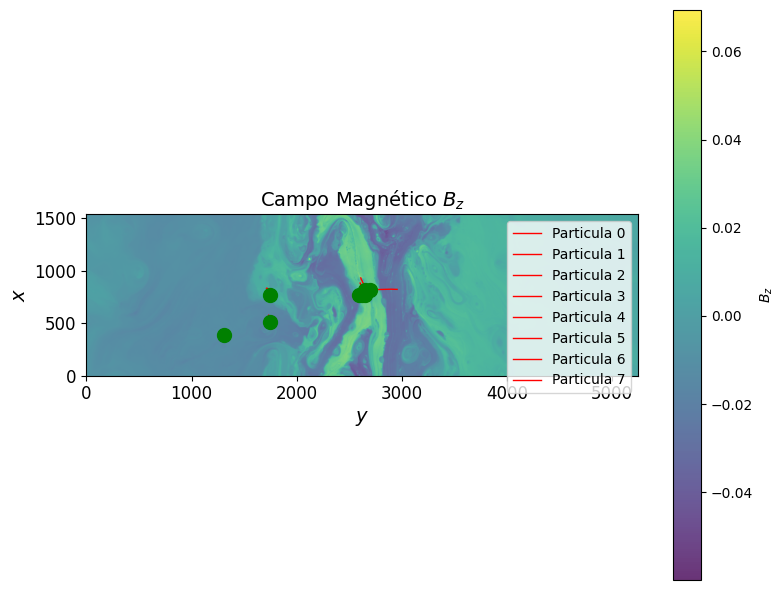

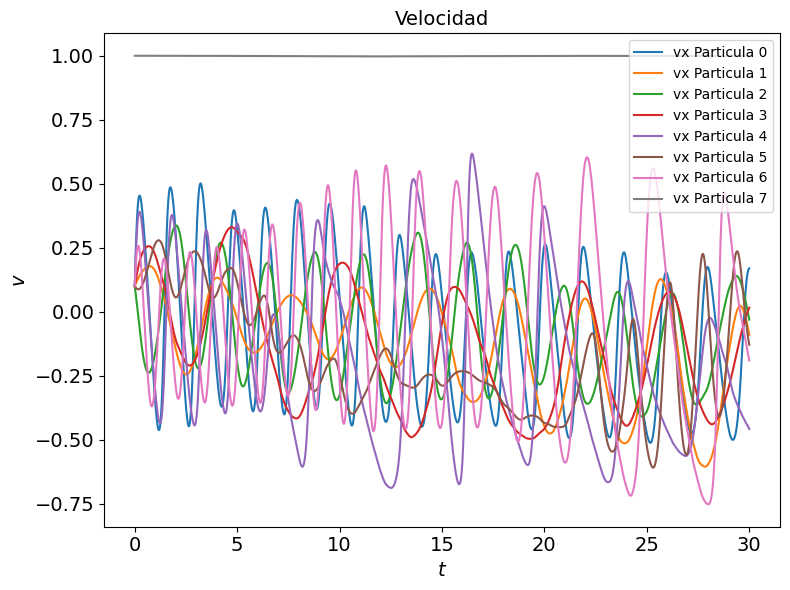

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

t=np.linspace(0,NT,int(NT*155*1)) # Defino mi Delta t como se obtuvo en en analisis

t1=np.linspace(0,NT,int(NT*155*factor)) # Defino mi Delta t como se obtuvo en en analisis

Np=int(np.size(r0)/3)

# Gráfico 3D de la trayectoria de la partícula
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')

for i in range(0,Np):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], r_plot[:, 2, i],label='particula ' +str(i))

    # Marcar el punto inicial
    ax.scatter(r_plot[0, 0, i], r_plot[0, 1, i], r_plot[0, 2, i], color='g', s=100)

ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$x$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
plt.legend()
plt.title('Trayectoria de la Partícula en 3D', fontsize=14)
plt.tight_layout()
plt.show()

# Gráfico 1D de gamma en función del tiempo
#t1=np.linspace(0,NT,len(gamma1))
fig2 = plt.figure(figsize=(8, 6))
for i in range(0,Np):
    plt.semilogy(t, gamma[:,i] - 1, label='particula ' +str(i))


plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{(\gamma-1)}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energia cinetica de la particula', fontsize=14)
plt.tight_layout()
plt.legend()

plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig3 = plt.figure(figsize=(8, 6))
for i in range(0,Np):
    plt.plot(t, r_plot[:, 0, i],label='particula '+ str(i))
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Posición en $x$', fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()
# Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz
fig4 = plt.figure(figsize=(8, 6))
for i in range(0,Np):
    plt.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1, label='Particula '+ str(i))

    plt.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

plt.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.colorbar(label='$B_z$', orientation='vertical')
plt.xlabel('$y$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Campo Magnético $B_z$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()

plt.show()

# Gráfico 1D de la posición en x en función del tiempo
fig6 = plt.figure(figsize=(8, 6))
for i in range(0,Np):
    plt.plot(t, v[:, 0, i],label='vx Particula ' +str(i))
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$v$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Velocidad', fontsize=14)
plt.tight_layout()
plt.legend()

# Mostrar los gráficos
plt.show()


In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

"Este codigo es para una animación bacan nomas"

# # Supongamos que ya tienes las variables r_plot, bz, x, y definidas

# # Configurar la figura y el eje
# fig, ax = plt.subplots(figsize=(8, 6))

# # Dibujar el campo magnético
# im = ax.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
# fig.colorbar(im, label='$B_z$', orientation='vertical')

# # Configurar el eje
# ax.set_xlabel('$y$', fontsize=14)
# ax.set_ylabel('$x$', fontsize=14)
# ax.set_title('Campo Magnético $B_z$ con Trayectoria de la Partícula', fontsize=14)
# ax.set_xticks(np.arange(x.min(), x.max(), (x.max()-x.min())/10))
# ax.set_yticks(np.arange(y.min(), y.max(), (y.max()-y.min())/10))
# ax.tick_params(axis='both', which='major', labelsize=12)

# # Inicializar la trayectoria y el punto móvil
# trajectory, = ax.plot([], [], 'r', linewidth=1, label='Trayectoria de la Partícula')
# point, = ax.plot([], [], 'ko', markersize=10)  # Cambiado a blanco (white)

# # Función de inicialización
# def init():
#     trajectory.set_data([], [])
#     point.set_data([], [])
#     return trajectory, point

# # Función de actualización
# def update(frame):
#     trajectory.set_data(r_plot[:frame, 0], r_plot[:frame, 1])
#     point.set_data(r_plot[frame, 0], r_plot[frame, 1])
#     return trajectory, point

# # Crear la animación con un intervalo más pequeño
# ani = animation.FuncAnimation(fig, update, frames=range(1, len(r_plot), 10), init_func=init, blit=True, repeat=False, interval=10)

# # Mostrar la leyenda
# ax.legend()

# # Guardar la animación como archivo .mp4 o .gif (opcional)
# ani.save('trayectoria_particula.mp4', writer='ffmpeg', fps=30)
# # ani.save('trayectoria_particula.gif', writer='imagemagick', fps=30)

# # Mostrar la animación
# plt.show()


'Este codigo es para una animación bacan nomas'

In [6]:
" Las siguientes tres son para el vel drift"

#normb=np.zeros((Nx,Ny))

#for i in range(0,Nx):
#  for j in range(0,Ny):
#    normb[i,j]=np.linalg.norm(b[:,i,j])


' Las siguientes tres son para el vel drift'

In [7]:
#drift_vel=np.zeros_like(b)

#print(e[:,0,0])

#for i in range(0,Nx):
#  for j in range(0,Ny):
#    drift_vel[:,i,j]=np.cross(e[:,i,j],b[:,i,j])/normb[i,j]**2


In [8]:
#np.savetxt('velocity_drift.txt', drift_vel.reshape(-1, drift_vel.shape[-1]))